In [1]:
!pip install pandas
!pip install -U scikit-learn
!pip install matplotlib
!pip install seaborn

You should consider upgrading via the 'c:\users\breno - pc\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Requirement already up-to-date: scikit-learn in c:\users\breno - pc\appdata\local\programs\python\python39\lib\site-packages (0.24.1)

You should consider upgrading via the 'c:\users\breno - pc\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\breno - pc\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\breno - pc\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [46]:
#Imports e ajustes necessários
import pandas as pd
import numpy as np  # biblioteca que suporta arrays e matrizes multidimensionais - https://numpy.org/
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
import seaborn as sns # biblioteca de visualização de dados

from sklearn.metrics import mean_squared_error
from sklearn import preprocessing # usado para preprocessar a base de dados (normalização)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

plt.rc("font", size=14)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


NameError: name 'asf' is not defined

In [37]:
data = pd.read_csv('CarPrice_Assignment.csv',header=0)
print(data)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [38]:
# Buscando a correlação de pearson no dataset
data.corr(method = 'pearson')

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


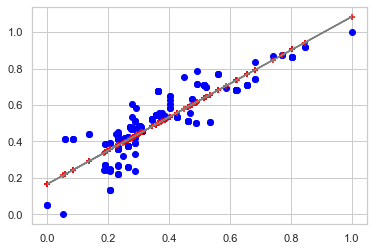

EQM: 0.00793254900369886


In [56]:
#wheelbase - carlength 
#Correlação de 0.874587

X = data.iloc[:, 9].values.reshape(-1, 1) 
Y = data.iloc[:, 10].values.reshape(-1, 1) 

#Normalizando os dados na escala (0,1)
scaler = MinMaxScaler(feature_range= (0,1))
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)


mediaX  = np.mean(X)
mediaX2 = np.mean(X**2)
mediaY  = np.mean(Y)
mediaY2 = np.mean(Y**2)
mediaXY = np.mean(X*Y)

teta0 = (mediaY*mediaX2 - mediaX*mediaXY)/(mediaX2 - (mediaX)**2)
teta1 =(mediaXY - mediaX*mediaY)/(mediaX2 - (mediaX)**2)

Y_pred_media = teta0+teta1*X

plt.scatter(X, Y,marker='o',color='blue')  #pontos originais
plt.scatter(X, Y_pred_media,marker='+',color='red') #pontos previstos
plt.plot(X, Y_pred_media, color='gray')
plt.show()

#Calculando o erro quadrado médio
print ("EQM: "+str(mean_squared_error(Y, Y_pred_media)))


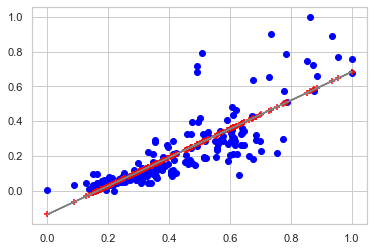

EQM: 0.01183074232029348


In [57]:
#curbweight - price
#Correlação de 0.835305

X = data.iloc[:, 13].values.reshape(-1, 1) 
Y = data.iloc[:, 25].values.reshape(-1, 1) 

#Normalizando os dados na escala (0,1)
scaler = MinMaxScaler(feature_range= (0,1))
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)


mediaX  = np.mean(X)
mediaX2 = np.mean(X**2)
mediaY  = np.mean(Y)
mediaY2 = np.mean(Y**2)
mediaXY = np.mean(X*Y)

teta0 = (mediaY*mediaX2 - mediaX*mediaXY)/(mediaX2 - (mediaX)**2)
teta1 =(mediaXY - mediaX*mediaY)/(mediaX2 - (mediaX)**2)

Y_pred_media = teta0+teta1*X

plt.scatter(X, Y,marker='o',color='blue')  #pontos originais
plt.scatter(X, Y_pred_media,marker='+',color='red') #pontos previstos
plt.plot(X, Y_pred_media, color='gray')
plt.show()

#Calculando o erro quadrado médio
print ("EQM: "+str(mean_squared_error(Y, Y_pred_media)))


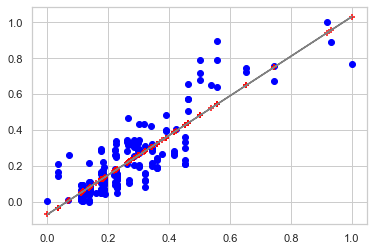

EQM: 0.009232032860029923


In [58]:
#enginesize - price
#Correlação de 0.874145

X = data.iloc[:, 16].values.reshape(-1, 1) 
Y = data.iloc[:, 25].values.reshape(-1, 1) 

#Normalizando os dados na escala (0,1)
scaler = MinMaxScaler(feature_range= (0,1))
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)


mediaX  = np.mean(X)
mediaX2 = np.mean(X**2)
mediaY  = np.mean(Y)
mediaY2 = np.mean(Y**2)
mediaXY = np.mean(X*Y)

teta0 = (mediaY*mediaX2 - mediaX*mediaXY)/(mediaX2 - (mediaX)**2)
teta1 =(mediaXY - mediaX*mediaY)/(mediaX2 - (mediaX)**2)

Y_pred_media = teta0+teta1*X

plt.scatter(X, Y,marker='o',color='blue')  #pontos originais
plt.scatter(X, Y_pred_media,marker='+',color='red') #pontos previstos
plt.plot(X, Y_pred_media, color='gray')
plt.show()

#Calculando o erro quadrado médio
print ("EQM: "+str(mean_squared_error(Y, Y_pred_media)))


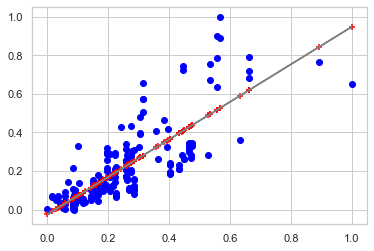

EQM: 0.013578191198003834


In [59]:
# horsepower - price
#Correlação de 0.808139


X = data.iloc[:, 21].values.reshape(-1, 1) 
Y = data.iloc[:, 25].values.reshape(-1, 1) 

#Normalizando os dados na escala (0,1)
scaler = MinMaxScaler(feature_range= (0,1))
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)


mediaX  = np.mean(X)
mediaX2 = np.mean(X**2)
mediaY  = np.mean(Y)
mediaY2 = np.mean(Y**2)
mediaXY = np.mean(X*Y)

teta0 = (mediaY*mediaX2 - mediaX*mediaXY)/(mediaX2 - (mediaX)**2)
teta1 =(mediaXY - mediaX*mediaY)/(mediaX2 - (mediaX)**2)

Y_pred_media = teta0+teta1*X

plt.scatter(X, Y,marker='o',color='blue')  #pontos originais
plt.scatter(X, Y_pred_media,marker='+',color='red') #pontos previstos
plt.plot(X, Y_pred_media, color='gray')
plt.show()

#Calculando o erro quadrado médio
print ("EQM: "+str(mean_squared_error(Y, Y_pred_media)))
